In [1]:
import csv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def get_data(name, column='Last'):
    """
    Data for this function should be taken from https://www.nasdaq.com/market-activity/stocks/*/historical,
    where '*' is the name of company.
    """
    number = {'Last': 1, 'Open': 3, 'High': 4, 'Low': 5}[column]
    with open(name+'.csv', 'r') as csvfile:
        data_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        res = np.array([float(e[2:]) for e in [row[number] for row in data_reader][:0:-1]])
    return res

In [3]:
def plot(data, name=''):
    plt.plot(data)
    plt.title(name)
    plt.xlabel('days')
    plt.ylabel('price, $')
    plt.grid()
    plt.show()

In [4]:
def la(data, p, second_order=True, eps=1e-5):
    Xi = 3 * (p + 1)
    X = data[np.arange(p) + np.arange(len(data) - p)[:, None]]
    omega = np.argpartition(np.sum(np.power(X - data[-p:], 2), axis=1), Xi)[:Xi]
    if not second_order:
        Y = np.hstack((np.ones(Xi)[:, None], X[omega]))
    else:
        idx = np.arange(p)[:, None] - np.arange(p) <= 0
        Y = np.hstack((np.ones(Xi)[:, None], (X[omega, :, None] * X[omega, None, :])[:, idx]))
    params = np.linalg.solve(Y.T @ Y + eps * np.eye(Y.shape[1]), Y.T @ data[omega + p])
    if not second_order:
        return params, np.sum(params * np.hstack([1, data[-p:]]))
    else:
        return params, np.sum(params * np.hstack([1, (data[-p:, None] * data[-p:])[idx]]))

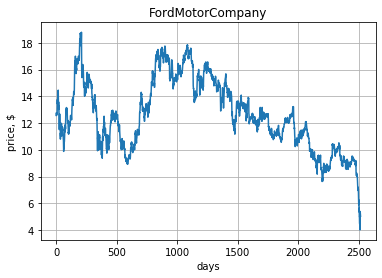

In [5]:
name = 'FordMotorCompany'
data = get_data(name, column='Last')
plot(data, name)

In [6]:
data[-1]

5.03

In [7]:
print(la(data[:-1], 100, second_order=False)[1])
%timeit -n 10 la(data[:-1], 100, second_order=False)[1]

5.04044792728646
11.1 ms ± 653 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
print(la(data[:-1], 20, second_order=True)[1])
%timeit -n 10 la(data[:-1], 25, second_order=True)[1]

3.9605856581104604
6.01 ms ± 894 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
